<a href="https://colab.research.google.com/github/rcarasek/Python-for-Investment/blob/main/PyForInvest_Colab_aula07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# CONFIGURANDO YAHOO FINANCE
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

Requirement already up-to-date: yfinance in /usr/local/lib/python3.7/dist-packages (0.1.59)


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)
matplotlib.rcParams.update({'font.size': 22})

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import norm, t

### análise estatistica iBov

In [8]:
ibov = yf.download('^BVSP')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [11]:
ibov

,Adj Close
Date,
1993-04-27,24.500000
1993-04-28,24.299999
1993-04-29,23.700001
1993-04-30,24.100000
1993-05-03,24.100000
...,...
2021-04-30,118894.000000
2021-05-03,119209.000000
2021-05-04,117712.000000


In [12]:
ibov['retorno'] = ibov['Adj Close'].pct_change()
ibov.dropna(inplace=True)

In [13]:
ibov

,Adj Close,retorno
Date,,
1993-04-28,24.299999,-0.008163
1993-04-29,23.700001,-0.024691
1993-04-30,24.100000,0.016878
1993-05-03,24.100000,0.000000
1993-05-04,24.900000,0.033195
...,...,...
2021-04-30,118894.000000,-0.009761
2021-05-03,119209.000000,0.002649
2021-05-04,117712.000000,-0.012558


Pandas **dataframe.pct_change() **function calculates the percentage change between the current and a prior element. This function by default calculates the percentage change from the immediately previous row.

Note : This function is mostly useful in the time-series data.

Syntax: DataFrame.pct_change(periods=1, fill_method=’pad’, limit=None, freq=None, **kwargs)

In [15]:
ibov['retorno'] = ibov['Adj Close'].pct_change()
ibov.dropna(inplace=True)

In [17]:
media_ibov = ibov['retorno'].mean()
print('Retorno médio = {:.2f}%'.format(media_ibov*100))

Retorno médio = 0.15%


In [18]:
desvio_padrao_ibov = ibov['retorno'].std()
print('Desvio Padrão = {:.2f}%'.format(desvio_padrao_ibov*100))

Desvio Padrão = 2.25%


In [19]:
ibov[ibov['retorno'] < -0.12]

,Adj Close,retorno
Date,,
1997-10-27,9817.0,-0.149675
1998-09-10,4761.0,-0.158090
2020-03-09,86067.0,-0.121738
2020-03-12,72583.0,-0.147797
2020-03-16,71168.0,-0.139215


Qual a probabilidade do ibov cair mais que 12% considerando que os retornos seguem uma distribuição normal?

In [20]:
probabilidade_teorica = norm.cdf(-0.12, loc=media_ibov, scale=desvio_padrao_ibov)
print('{:.8f}%'.format(probabilidade_teorica*100))

0.00000353%


In [21]:
frequencia_teorica = 1 / probabilidade_teorica
print('Uma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Uma vez a cada 28340009 dias
Ou uma vez a cada 112460 anos


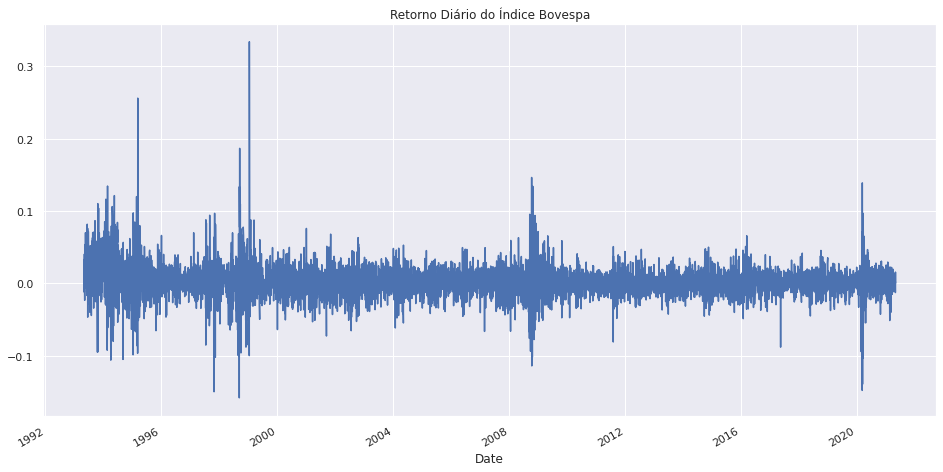

In [22]:
ibov['retorno'].plot(title="Retorno Diário do Índice Bovespa");


In [24]:
ibov['retorno_teorico'] = norm.rvs(size=ibov['retorno'].size,  loc=media_ibov, scale=desvio_padrao_ibov)

(-0.2, 0.4)

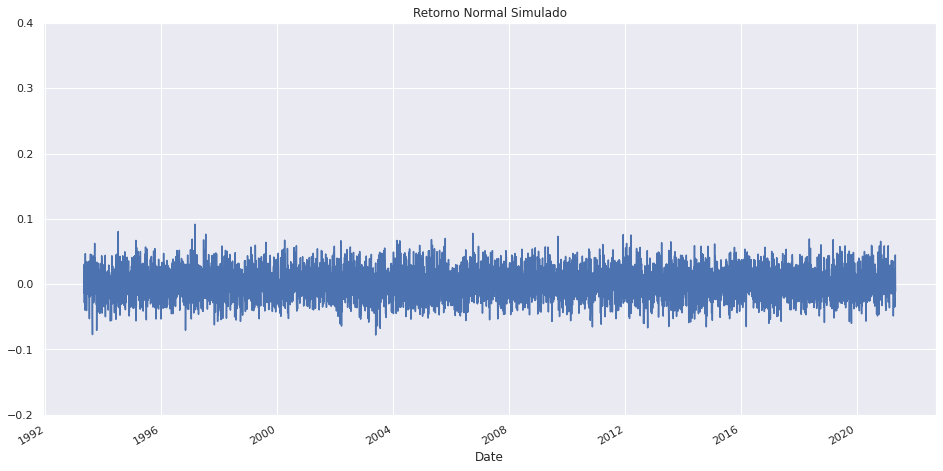

In [25]:

ax = ibov['retorno_teorico'].plot(title="Retorno Normal Simulado");
ax.set_ylim(-0.2, 0.4)

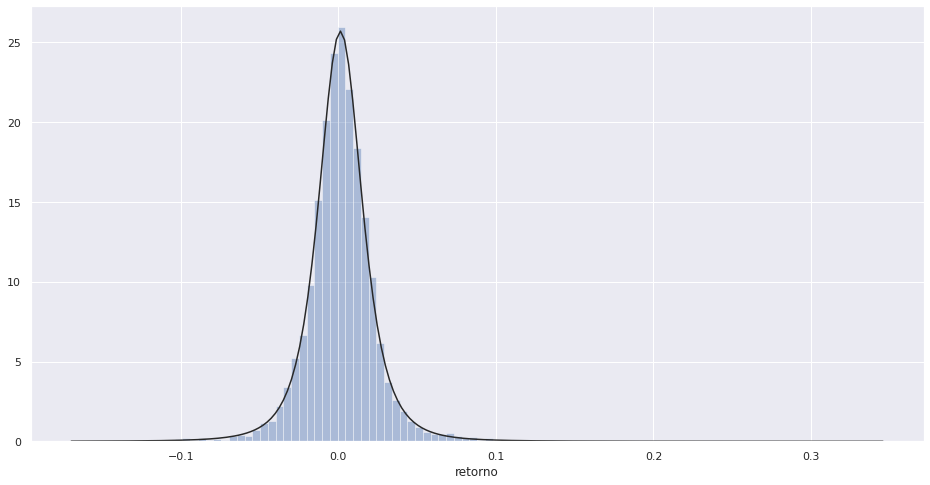

In [26]:
sns.distplot(ibov['retorno'], bins=100, kde=False, fit=t);


In [27]:
(graus_de_liberdade,  media_t, desvio_padrao_t) = t.fit(ibov['retorno'])
print('Distribuição T-Student\nGraus de liberdade={:.2f} \nMédia={:.4f} \nDesvio padrão={:.5f}'.format(graus_de_liberdade, media_t, desvio_padrao_t))

Distribuição T-Student
Graus de liberdade=3.27 
Média=0.0012 
Desvio padrão=0.01440


In [28]:
probabilidade_teorica_t = t.cdf(-0.12, graus_de_liberdade,  loc=media_t, scale=desvio_padrao_t)
print('{:.8f}%'.format(probabilidade_teorica_t*100))

0.12581355%


In [29]:
frequencia_teorica_t = 1 / probabilidade_teorica_t
print('Para uma distribuição T-Student: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica_t, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica_t/252, 5))))

Para uma distribuição T-Student: 
Uma vez a cada 794 dias
Ou uma vez a cada 3 anos


In [30]:
frequencia_teorica = 1 / probabilidade_teorica
print('Para uma distribuição Normal: \nUma vez a cada {} dias'.format(int(round(frequencia_teorica, 5))))
print('Ou uma vez a cada {} anos'.format(int(round(frequencia_teorica/252, 5))))

Para uma distribuição Normal: 
Uma vez a cada 28340009 dias
Ou uma vez a cada 112460 anos


In [31]:
frequencia_observada = ibov['retorno'].size / ibov[ibov["retorno"] < -0.12].shape[0] 
print('Na vida real aconteceu: \nUma vez a cada {} dias'.format(int(round(frequencia_observada, 5))))

Na vida real aconteceu: 
Uma vez a cada 1385 dias
